In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('final_data1.csv')
df.head(10)

,index,Ax1,Ay1,Az1,Ax2,Ay2,Az2,label
0,0,-0.34741,-0.39551,0.94263,-0.05273,0.30005,0.91821,0.0
1,1,-0.13452,-0.36768,0.97095,-0.04932,0.30176,0.92676,0.0
2,2,-0.11279,-0.36182,0.96289,-0.04785,0.29639,0.92505,0.0
3,3,-0.12915,-0.36792,0.95898,-0.05713,0.29785,0.92041,0.0
4,4,-0.13379,-0.36548,0.96753,-0.05810,0.31104,0.92578,0.0
5,5,-0.13184,-0.34766,0.96753,-0.06103,0.30420,0.93726,0.0
6,6,-0.14087,-0.35181,0.97266,-0.06567,0.29517,0.92554,0.0
7,7,-0.12866,-0.34229,0.95898,-0.06177,0.30542,0.92773,0.0
8,8,-0.14526,-0.34595,0.96606,-0.06226,0.29736,0.92188,0.0
9,9,-0.13037,-0.34814,0.96704,-0.04492,0.35596,0.92480,0.0


In [4]:
df.drop('index', axis='columns', inplace=True)
df.head()

,Ax1,Ay1,Az1,Ax2,Ay2,Az2,label
0,-0.34741,-0.39551,0.94263,-0.05273,0.30005,0.91821,0.0
1,-0.13452,-0.36768,0.97095,-0.04932,0.30176,0.92676,0.0
2,-0.11279,-0.36182,0.96289,-0.04785,0.29639,0.92505,0.0
3,-0.12915,-0.36792,0.95898,-0.05713,0.29785,0.92041,0.0
4,-0.13379,-0.36548,0.96753,-0.05810,0.31104,0.92578,0.0


In [5]:
df_feature = df[['Ax1', 'Ay1', 'Az1', 'Ax2', 'Ay2', 'Az2']]
X = np.asarray(df_feature)
Y = np.asarray(df['label'])

#### Splitting into Training and Testing

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 4)

### Decision Tree

#### Grid Search

In [19]:
param_dict = {
    "criterion" : ['gini' , 'entropy'],
    "max_depth": range (1,31),
    "min_samples_split":range (1,10),
    "min_samples_leaf": range(1,5)
} 

In [21]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model1, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 2160 candidates, totalling 21600 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.44235491 0.44235491 ... 0.99436384 0.99425223 0.99453125]
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [22]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [25]:
grid.best_score_

0.9948660714285713

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=13)
dt_model.fit(X_train, y_train)
y_pred1 = dt_model.predict(X_test)

In [35]:
dt_model.score(X_train, y_train)

0.9979352678571428

In [36]:
dt_model.score(X_test, y_test)

0.9957589285714286

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1632
         1.0       0.99      1.00      0.99      1759
         2.0       1.00      1.00      1.00      1511
         3.0       0.99      0.96      0.98       733
         4.0       1.00      1.00      1.00      2242
         5.0       1.00      1.00      1.00      1083

    accuracy                           1.00      8960
   macro avg       1.00      0.99      0.99      8960
weighted avg       1.00      1.00      1.00      8960



In [38]:
from sklearn.metrics import  confusion_matrix
print(confusion_matrix(y_test,y_pred1))

[[1630    0    0    2    0    0]
 [   0 1758    0    0    1    0]
 [   0    0 1508    3    0    0]
 [   0   18    2  707    6    0]
 [   0    1    0    3 2237    1]
 [   0    1    0    0    0 1082]]


### SVM

#### Grid Search

In [7]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf','poly','linear']}

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(SVC(), param_grid, refit=True, verbose=5)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.994 total time=   2.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.994 total time=   2.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   2.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.994 total time=   2.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   2.4s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.987 total time=   1.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.989 total time=   1.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.988 total time=   1.4s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.987 total time=   1.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.985 total time=   1.2s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.958 total time=   2.9s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=5)

In [8]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [9]:
grid.best_score_

0.9970703125

In [25]:
import matplotlib.pyplot as plt

def plot_grid_search(cv_results, metric, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
#     scores_mean = cv_results[('mean_test_' + metric)]
#     scores_sd = cv_results[('std_test_' + metric)]
    scores_mean = cv_results['mean_test_score']
    scores_sd = cv_results['std_test_score']

    if grid_param_2 is not None:
        scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))
        scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Set plot style
    plt.style.use('seaborn')

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)


    if grid_param_2 is not None:
        # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
        for idx, val in enumerate(grid_param_2):
            ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val), grid_param_1[23])
    else:
        # If only one Param1 is given
        ax.plot(grid_param_1, scores_mean, '-o')

    ax.set_title("SVM Grid Search Results", fontsize=20, fontweight='normal')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel(metric)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    print(grid_param_1[23])

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_9964/2870471240.py, line 24)

0.9583750000000001


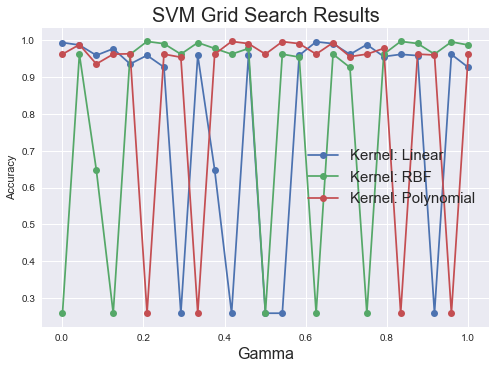

In [15]:
plot_grid_search(grid.cv_results_,
                 'Accuracy',
                 list(np.linspace(0.001, 1, 25)), 
                 ['Linear', 'RBF','Polynomial'],
                 'Gamma',
                 'Kernel')

208.4125


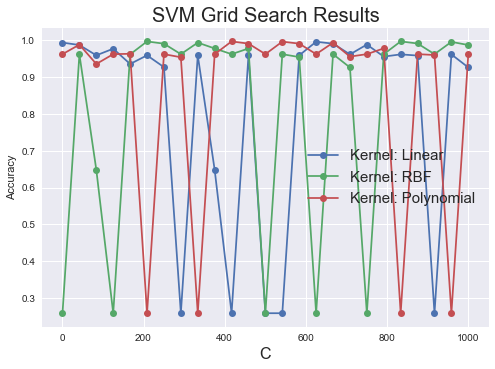

In [17]:
plot_grid_search(grid.cv_results_,
                 'Accuracy',
                 list(np.linspace(0.1, 1000, 25)), 
                 ['Linear', 'RBF','Polynomial'],
                 'C',
                 'Kernel')

In [18]:
from sklearn import svm

svm_model = svm.SVC(kernel='rbf', gamma=0.9583750000000001, C=208.4125)
svm_model.fit(X_train, y_train)

SVC(C=208.4125, gamma=0.9583750000000001)

In [19]:
y_predict = svm_model.predict(X_test)

In [20]:
print("Traning Accuracy : ", svm_model.score(X_train, y_train))
print("Testing Accuracy : ", svm_model.score(X_test, y_test))

Traning Accuracy :  0.998828125
Testing Accuracy :  0.9986607142857142


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1632
         1.0       1.00      1.00      1.00      1759
         2.0       1.00      1.00      1.00      1511
         3.0       1.00      0.99      0.99       733
         4.0       1.00      1.00      1.00      2242
         5.0       1.00      1.00      1.00      1083

    accuracy                           1.00      8960
   macro avg       1.00      1.00      1.00      8960
weighted avg       1.00      1.00      1.00      8960



In [24]:
from sklearn.metrics import  confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[1632    0    0    0    0    0]
 [   0 1758    0    0    1    0]
 [   0    0 1511    0    0    0]
 [   0    3    1  726    3    0]
 [   0    1    0    2 2239    0]
 [   0    0    0    1    0 1082]]


### KNN

#### Grid Search

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [66]:
grid.best_params_

{'n_neighbors': 5}

In [67]:
grid.best_score_

0.9961216517857144

In [45]:
from sklearn.neighbors import KNeighborsClassifier    
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn_model.fit(X_train, y_train)
y_pred= knn_model.predict(X_test)

In [46]:
print("Traning Accuracy : ", knn_model.score(X_train, y_train))
print("Testing Accuracy : ", knn_model.score(X_test, y_test))

Traning Accuracy :  0.9968191964285714
Testing Accuracy :  0.9977678571428571


In [47]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1632
         1.0       1.00      1.00      1.00      1759
         2.0       1.00      1.00      1.00      1511
         3.0       1.00      0.99      0.99       733
         4.0       1.00      1.00      1.00      2242
         5.0       1.00      1.00      1.00      1083

    accuracy                           1.00      8960
   macro avg       1.00      1.00      1.00      8960
weighted avg       1.00      1.00      1.00      8960



In [48]:
print(confusion_matrix(y_test,y_predict))

[[1632    0    0    0    0    0]
 [   0 1758    0    0    1    0]
 [   0    0 1511    0    0    0]
 [   0    3    1  727    2    0]
 [   0    2    0    2 2238    0]
 [   0    0    0    1    0 1082]]


### Random Forest

#### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier()

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

In [50]:
print("Traning Accuracy : ", rf_model.score(X_train, y_train))
print("Testing Accuracy : ", rf_model.score(X_test, y_test))

Traning Accuracy :  1.0
Testing Accuracy :  0.9985491071428572


In [51]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1632
         1.0       1.00      1.00      1.00      1759
         2.0       1.00      1.00      1.00      1511
         3.0       1.00      0.99      0.99       733
         4.0       1.00      1.00      1.00      2242
         5.0       1.00      1.00      1.00      1083

    accuracy                           1.00      8960
   macro avg       1.00      1.00      1.00      8960
weighted avg       1.00      1.00      1.00      8960



In [52]:
print(confusion_matrix(y_test,y_predict))

[[1632    0    0    0    0    0]
 [   0 1758    0    0    1    0]
 [   0    0 1511    0    0    0]
 [   0    3    1  727    2    0]
 [   0    2    0    2 2238    0]
 [   0    0    0    1    0 1082]]
